## Imports

In [57]:
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format)
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(15, 5)

In [61]:
from utils import add_remaining_useful_life

## Load Data

In [25]:
index_cols = ['unit_number', 'time_cycle']
setting_cols = ['os_1', 'os_2', 'os_3']
sensor_cols = ['s_' + str(num) for num in range(1, 22)]
cols = index_cols + setting_cols + sensor_cols
data = pd.read_csv('data/train_FD003.txt', header=None, sep='\s+', names=cols)

## Explorations

In [28]:
data.describe()

,unit_number,time_cycle,os_1,os_2,os_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.002194,0.000294,0.0,0.00,0.523031,6.810418,9.773178,3.552786e-15,...,3.255314,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,-0.008600,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,0.000000,-0.000000,100.0,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,0.001500,0.000300,100.0,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,0.008600,0.000700,100.0,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [29]:
data[sensor_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.552786e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


In [33]:
max_ruls = data[index_cols].groupby('unit_number').max('time_cycle')

<AxesSubplot:xlabel='unit_number'>

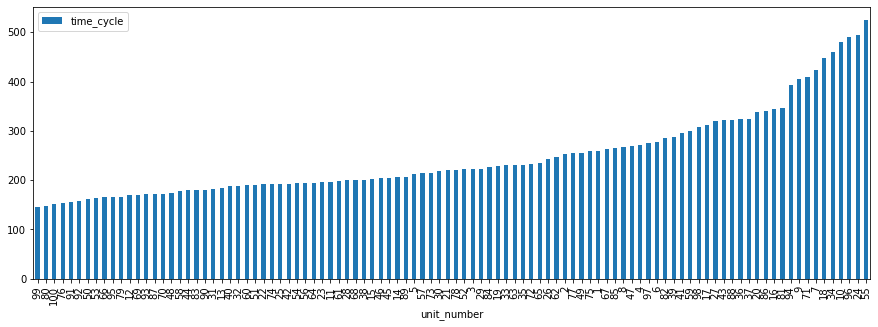

In [48]:
max_ruls.sort_values('time_cycle').plot(kind='bar', rot=90)

array([[<AxesSubplot:title={'center':'time_cycle'}>]], dtype=object)

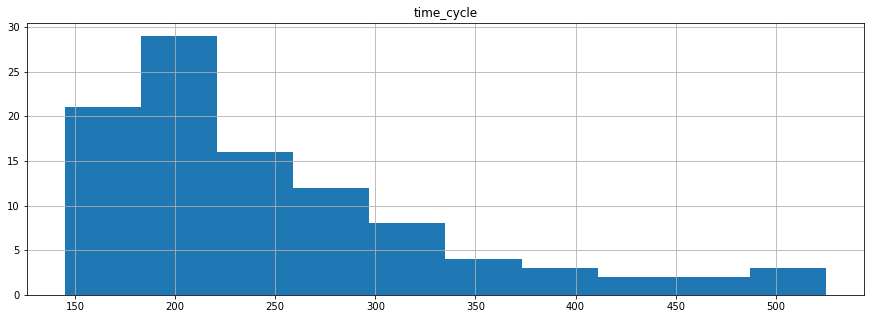

In [49]:
max_ruls.hist()

In [51]:
data = add_remaining_useful_life(data)

In [60]:
data.corr()['RUL'].sort_values().to_frame()

,RUL
s_11,-0.68892
s_4,-0.65722
s_13,-0.65634
s_8,-0.65534
s_17,-0.64922
s_3,-0.62424
s_2,-0.59056
s_9,-0.55184
time_cycle,-0.48274
s_14,-0.48181
